#Libraries


In [16]:
import pandas as pd
import numpy as np
from google.colab import drive
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [17]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Dataset


In [18]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Agrimonia/Recap previous thesis/Agrimonia_Dataset_v_2_0_1.csv")
pd.set_option('display.max_columns', None)
df['Latitude'] = df['Latitude'].round(2)
df['Longitude'] = df['Longitude'].round(2)

df['AQ_nh3'] = df['AQ_nh3'].replace('NaN', np.nan)
df.head()

<ipython-input-18-c496d5c7ae23>:1: DtypeWarning: Columns (0,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Agrimonia/Recap previous thesis/Agrimonia_Dataset_v_2_0_1.csv")


,IDStations,Latitude,Longitude,Time,Altitude,AQ_pm10,AQ_pm25,AQ_co,AQ_nh3,AQ_nox,AQ_no2,AQ_so2,WE_temp_2m,WE_wind_speed_10m_mean,WE_wind_speed_10m_max,WE_mode_wind_direction_10m,WE_tot_precipitation,WE_precipitation_t,WE_surface_pressure,WE_solar_radiation,WE_rh_min,WE_rh_mean,WE_rh_max,WE_wind_speed_100m_mean,WE_wind_speed_100m_max,WE_mode_wind_direction_100m,WE_blh_layer_max,WE_blh_layer_min,EM_nh3_livestock_mm,EM_nh3_agr_soils,EM_nh3_agr_waste_burn,EM_nh3_sum,EM_nox_traffic,EM_nox_sum,EM_so2_sum,LI_pigs,LI_bovine,LA_hvi,LA_lvi,LA_land_use,LA_soil_use
0,1264,46.17,9.88,2016-01-01,290,6.200e+01,5.300e+01,NaN,NaN,8.263e+01,3.772e+01,NaN,-2.212,0.5970,0.9883,S,0.00037,0,83720.0,5664000.0,88.70,93.66,99.19,1.0730,1.977,S,340.6,10.63,2.015e-01,1.462e-01,2.019e-03,6.166e-01,8.359e-01,1.720e+00,3.906e-01,0.3832,5.892,3.998,1.234,112,17.0
1,1264,46.17,9.88,2016-01-02,290,7.300e+01,6.300e+01,NaN,NaN,1.017e+02,3.884e+01,NaN,-3.063,0.4402,0.7365,SE,0.07521,5,82990.0,1335000.0,94.07,97.60,99.24,1.0530,2.321,S,238.7,21.55,2.020e-01,1.589e-01,1.956e-03,6.298e-01,8.372e-01,1.720e+00,3.911e-01,0.3832,5.892,3.997,1.234,112,17.0
2,1264,46.17,9.88,2016-01-03,290,4.400e+01,3.900e+01,NaN,NaN,6.626e+01,3.234e+01,NaN,-2.768,0.6954,1.0100,S,0.02744,5,82320.0,3728000.0,90.15,95.73,98.55,1.9810,2.942,S,407.0,22.80,2.024e-01,1.708e-01,1.890e-03,6.424e-01,8.384e-01,1.720e+00,3.916e-01,0.3832,5.892,3.997,1.234,112,17.0
3,1264,46.17,9.88,2016-01-04,290,3.100e+01,2.900e+01,NaN,NaN,6.331e+01,3.167e+01,NaN,-4.352,0.5812,0.9421,W,0.08564,5,81410.0,1846000.0,90.84,96.01,99.43,1.2080,2.284,N,536.7,12.21,2.027e-01,1.821e-01,1.822e-03,6.545e-01,8.396e-01,1.720e+00,3.923e-01,0.3832,5.892,3.997,1.234,112,17.0
4,1264,46.17,9.88,2016-01-05,290,2.700e+01,2.600e+01,NaN,NaN,7.553e+01,3.333e+01,NaN,-6.184,0.5906,0.9847,SE,0.01802,5,81530.0,1733000.0,89.31,93.53,99.05,0.8226,1.672,SE,472.4,10.15,2.031e-01,1.929e-01,1.750e-03,6.660e-01,8.409e-01,1.720e+00,3.931e-01,0.3832,5.892,3.997,1.233,112,17.0


## Select the subset

In [19]:
df = df[df['IDStations']==1266]
df.head()

,IDStations,Latitude,Longitude,Time,Altitude,AQ_pm10,AQ_pm25,AQ_co,AQ_nh3,AQ_nox,AQ_no2,AQ_so2,WE_temp_2m,WE_wind_speed_10m_mean,WE_wind_speed_10m_max,WE_mode_wind_direction_10m,WE_tot_precipitation,WE_precipitation_t,WE_surface_pressure,WE_solar_radiation,WE_rh_min,WE_rh_mean,WE_rh_max,WE_wind_speed_100m_mean,WE_wind_speed_100m_max,WE_mode_wind_direction_100m,WE_blh_layer_max,WE_blh_layer_min,EM_nh3_livestock_mm,EM_nh3_agr_soils,EM_nh3_agr_waste_burn,EM_nh3_sum,EM_nox_traffic,EM_nox_sum,EM_so2_sum,LI_pigs,LI_bovine,LA_hvi,LA_lvi,LA_land_use,LA_soil_use
4384,1266,45.23,9.67,2016-01-01,65,5.200e+01,NaN,NaN,3.220e+01,3.621e+01,2.350e+01,NaN,2.1610,0.9449,1.818,E,0.000009,0,101900.0,5330000.0,92.17,97.16,99.67,1.429,2.622,NE,351.7,13.88,8.907e+00,3.187e-01,1.439e-01,9.749e+00,1.922e+00,3.844e+00,9.099e-01,513.5,255.2,1.548,2.084,112,17.0
4385,1266,45.23,9.67,2016-01-02,65,3.900e+01,NaN,NaN,1.460e+01,2.972e+01,2.475e+01,NaN,0.9301,1.4660,2.335,E,0.102000,1,101100.0,782500.0,97.69,99.12,99.88,2.693,4.317,E,263.3,42.82,8.927e+00,3.462e-01,1.395e-01,9.792e+00,1.925e+00,3.832e+00,9.082e-01,514.0,255.1,1.548,2.084,112,17.0
4386,1266,45.23,9.67,2016-01-03,65,2.600e+01,NaN,NaN,1.120e+01,2.827e+01,2.415e+01,NaN,2.2690,2.0650,3.364,E,0.053580,1,100200.0,3285000.0,96.03,98.46,99.89,3.978,6.581,E,355.5,98.28,8.944e+00,3.722e-01,1.348e-01,9.832e+00,1.928e+00,3.821e+00,9.067e-01,514.5,255.1,1.548,2.084,112,17.0
4387,1266,45.23,9.67,2016-01-04,65,2.900e+01,NaN,NaN,1.080e+01,2.462e+01,1.971e+01,NaN,1.8980,1.3000,3.356,E,0.075220,1,99250.0,1760000.0,96.12,98.12,99.81,2.657,6.460,E,345.6,21.80,8.961e+00,3.969e-01,1.299e-01,9.869e+00,1.931e+00,3.809e+00,9.054e-01,515.0,255.0,1.548,2.083,112,17.0
4388,1266,45.23,9.67,2016-01-05,65,3.400e+01,NaN,NaN,1.510e+01,3.484e+01,2.293e+01,NaN,1.5550,1.0270,1.708,E,0.012900,1,99310.0,1429000.0,97.10,99.06,99.84,2.079,3.423,E,231.6,24.76,8.976e+00,4.204e-01,1.248e-01,9.903e+00,1.933e+00,3.797e+00,9.042e-01,515.5,254.9,1.548,2.083,112,17.0


In [20]:
df = df.drop(['AQ_so2', 'AQ_pm25', 'AQ_co'], axis=1)
df.head()

,IDStations,Latitude,Longitude,Time,Altitude,AQ_pm10,AQ_nh3,AQ_nox,AQ_no2,WE_temp_2m,WE_wind_speed_10m_mean,WE_wind_speed_10m_max,WE_mode_wind_direction_10m,WE_tot_precipitation,WE_precipitation_t,WE_surface_pressure,WE_solar_radiation,WE_rh_min,WE_rh_mean,WE_rh_max,WE_wind_speed_100m_mean,WE_wind_speed_100m_max,WE_mode_wind_direction_100m,WE_blh_layer_max,WE_blh_layer_min,EM_nh3_livestock_mm,EM_nh3_agr_soils,EM_nh3_agr_waste_burn,EM_nh3_sum,EM_nox_traffic,EM_nox_sum,EM_so2_sum,LI_pigs,LI_bovine,LA_hvi,LA_lvi,LA_land_use,LA_soil_use
4384,1266,45.23,9.67,2016-01-01,65,5.200e+01,3.220e+01,3.621e+01,2.350e+01,2.1610,0.9449,1.818,E,0.000009,0,101900.0,5330000.0,92.17,97.16,99.67,1.429,2.622,NE,351.7,13.88,8.907e+00,3.187e-01,1.439e-01,9.749e+00,1.922e+00,3.844e+00,9.099e-01,513.5,255.2,1.548,2.084,112,17.0
4385,1266,45.23,9.67,2016-01-02,65,3.900e+01,1.460e+01,2.972e+01,2.475e+01,0.9301,1.4660,2.335,E,0.102000,1,101100.0,782500.0,97.69,99.12,99.88,2.693,4.317,E,263.3,42.82,8.927e+00,3.462e-01,1.395e-01,9.792e+00,1.925e+00,3.832e+00,9.082e-01,514.0,255.1,1.548,2.084,112,17.0
4386,1266,45.23,9.67,2016-01-03,65,2.600e+01,1.120e+01,2.827e+01,2.415e+01,2.2690,2.0650,3.364,E,0.053580,1,100200.0,3285000.0,96.03,98.46,99.89,3.978,6.581,E,355.5,98.28,8.944e+00,3.722e-01,1.348e-01,9.832e+00,1.928e+00,3.821e+00,9.067e-01,514.5,255.1,1.548,2.084,112,17.0
4387,1266,45.23,9.67,2016-01-04,65,2.900e+01,1.080e+01,2.462e+01,1.971e+01,1.8980,1.3000,3.356,E,0.075220,1,99250.0,1760000.0,96.12,98.12,99.81,2.657,6.460,E,345.6,21.80,8.961e+00,3.969e-01,1.299e-01,9.869e+00,1.931e+00,3.809e+00,9.054e-01,515.0,255.0,1.548,2.083,112,17.0
4388,1266,45.23,9.67,2016-01-05,65,3.400e+01,1.510e+01,3.484e+01,2.293e+01,1.5550,1.0270,1.708,E,0.012900,1,99310.0,1429000.0,97.10,99.06,99.84,2.079,3.423,E,231.6,24.76,8.976e+00,4.204e-01,1.248e-01,9.903e+00,1.933e+00,3.797e+00,9.042e-01,515.5,254.9,1.548,2.083,112,17.0


In [21]:
print(df.dtypes)


IDStations                      object
Latitude                       float64
Longitude                      float64
Time                            object
Altitude                         int64
AQ_pm10                         object
AQ_nh3                          object
AQ_nox                          object
AQ_no2                          object
WE_temp_2m                     float64
WE_wind_speed_10m_mean         float64
WE_wind_speed_10m_max          float64
WE_mode_wind_direction_10m      object
WE_tot_precipitation           float64
WE_precipitation_t               int64
WE_surface_pressure            float64
WE_solar_radiation             float64
WE_rh_min                      float64
WE_rh_mean                     float64
WE_rh_max                      float64
WE_wind_speed_100m_mean        float64
WE_wind_speed_100m_max         float64
WE_mode_wind_direction_100m     object
WE_blh_layer_max               float64
WE_blh_layer_min               float64
EM_nh3_livestock_mm      

In [22]:
#df['IDStations'] = df['IDStations'].astype(float)
df['AQ_pm10'] = df['AQ_pm10'].astype(float)
df['AQ_nh3'] = df['AQ_nh3'].astype(float)
df['AQ_nox'] = df['AQ_nox'].astype(float)
df['AQ_no2'] = df['AQ_no2'].astype(float)

df['EM_nh3_livestock_mm'] = df['EM_nh3_livestock_mm'].astype(float)
df['EM_nh3_agr_soils'] = df['EM_nh3_agr_soils'].astype(float)
df['EM_nh3_agr_waste_burn'] = df['EM_nh3_agr_waste_burn'].astype(float)
df['EM_nh3_sum'] = df['EM_nh3_sum'].astype(float)
df['EM_nox_traffic'] = df['EM_nox_traffic'].astype(float)
df['EM_nox_sum'] = df['EM_nox_sum'].astype(float)
df['EM_so2_sum'] = df['EM_so2_sum'].astype(float)
df['LI_pigs'] = df['LI_pigs'].astype(float)
df['LI_bovine'] = df['LI_bovine'].astype(float)

In [23]:
print(df.dtypes)


IDStations                      object
Latitude                       float64
Longitude                      float64
Time                            object
Altitude                         int64
AQ_pm10                        float64
AQ_nh3                         float64
AQ_nox                         float64
AQ_no2                         float64
WE_temp_2m                     float64
WE_wind_speed_10m_mean         float64
WE_wind_speed_10m_max          float64
WE_mode_wind_direction_10m      object
WE_tot_precipitation           float64
WE_precipitation_t               int64
WE_surface_pressure            float64
WE_solar_radiation             float64
WE_rh_min                      float64
WE_rh_mean                     float64
WE_rh_max                      float64
WE_wind_speed_100m_mean        float64
WE_wind_speed_100m_max         float64
WE_mode_wind_direction_100m     object
WE_blh_layer_max               float64
WE_blh_layer_min               float64
EM_nh3_livestock_mm      

In [24]:
print(df.isna().sum())

IDStations                       0
Latitude                         0
Longitude                        0
Time                             0
Altitude                         0
AQ_pm10                         65
AQ_nh3                         296
AQ_nox                          75
AQ_no2                          75
WE_temp_2m                       0
WE_wind_speed_10m_mean           0
WE_wind_speed_10m_max            0
WE_mode_wind_direction_10m       0
WE_tot_precipitation             0
WE_precipitation_t               0
WE_surface_pressure              0
WE_solar_radiation               0
WE_rh_min                        0
WE_rh_mean                       0
WE_rh_max                        0
WE_wind_speed_100m_mean          0
WE_wind_speed_100m_max           0
WE_mode_wind_direction_100m      0
WE_blh_layer_max                 0
WE_blh_layer_min                 0
EM_nh3_livestock_mm            365
EM_nh3_agr_soils               365
EM_nh3_agr_waste_burn          365
EM_nh3_sum          

In [25]:
df.dropna(inplace=True)
df

,IDStations,Latitude,Longitude,Time,Altitude,AQ_pm10,AQ_nh3,AQ_nox,AQ_no2,WE_temp_2m,WE_wind_speed_10m_mean,WE_wind_speed_10m_max,WE_mode_wind_direction_10m,WE_tot_precipitation,WE_precipitation_t,WE_surface_pressure,WE_solar_radiation,WE_rh_min,WE_rh_mean,WE_rh_max,WE_wind_speed_100m_mean,WE_wind_speed_100m_max,WE_mode_wind_direction_100m,WE_blh_layer_max,WE_blh_layer_min,EM_nh3_livestock_mm,EM_nh3_agr_soils,EM_nh3_agr_waste_burn,EM_nh3_sum,EM_nox_traffic,EM_nox_sum,EM_so2_sum,LI_pigs,LI_bovine,LA_hvi,LA_lvi,LA_land_use,LA_soil_use
4384,1266,45.23,9.67,2016-01-01,65,52.0,32.2,36.21,23.50,2.1610,0.9449,1.818,E,0.000009,0,101900.0,5330000.0,92.17,97.16,99.67,1.429,2.622,NE,351.7,13.88,8.907,0.3187,0.1439,9.749,1.922,3.844,0.9099,513.5,255.2,1.548,2.084,112,17.0
4385,1266,45.23,9.67,2016-01-02,65,39.0,14.6,29.72,24.75,0.9301,1.4660,2.335,E,0.102000,1,101100.0,782500.0,97.69,99.12,99.88,2.693,4.317,E,263.3,42.82,8.927,0.3462,0.1395,9.792,1.925,3.832,0.9082,514.0,255.1,1.548,2.084,112,17.0
4386,1266,45.23,9.67,2016-01-03,65,26.0,11.2,28.27,24.15,2.2690,2.0650,3.364,E,0.053580,1,100200.0,3285000.0,96.03,98.46,99.89,3.978,6.581,E,355.5,98.28,8.944,0.3722,0.1348,9.832,1.928,3.821,0.9067,514.5,255.1,1.548,2.084,112,17.0
4387,1266,45.23,9.67,2016-01-04,65,29.0,10.8,24.62,19.71,1.8980,1.3000,3.356,E,0.075220,1,99250.0,1760000.0,96.12,98.12,99.81,2.657,6.460,E,345.6,21.80,8.961,0.3969,0.1299,9.869,1.931,3.809,0.9054,515.0,255.0,1.548,2.083,112,17.0
4388,1266,45.23,9.67,2016-01-05,65,34.0,15.1,34.84,22.93,1.5550,1.0270,1.708,E,0.012900,1,99310.0,1429000.0,97.10,99.06,99.84,2.079,3.423,E,231.6,24.76,8.976,0.4204,0.1248,9.903,1.933,3.797,0.9042,515.5,254.9,1.548,2.083,112,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5840,1266,45.23,9.67,2019-12-27,65,50.0,42.8,96.50,34.48,4.1010,0.8183,1.877,NW,0.001527,0,101600.0,4225000.0,92.92,96.34,98.53,1.502,3.233,W,254.7,11.51,9.002,0.7423,0.1610,10.470,1.106,2.881,0.8955,521.4,253.9,1.548,2.085,112,17.0
5841,1266,45.23,9.67,2019-12-28,65,62.0,40.7,105.50,34.10,3.3690,1.4380,2.083,E,0.000138,0,102400.0,3343000.0,94.78,97.82,99.95,2.336,4.549,E,271.1,16.37,8.971,0.6313,0.1577,10.320,1.097,2.860,0.8926,521.4,253.9,1.548,2.085,112,17.0
5842,1266,45.23,9.67,2019-12-29,65,65.0,38.7,77.59,28.73,2.6440,1.0990,2.978,E,0.000275,1,102700.0,4482000.0,94.17,97.99,99.75,2.017,5.354,E,347.0,14.37,8.943,0.5322,0.1543,10.190,1.089,2.841,0.8899,521.4,253.9,1.548,2.084,112,17.0
5843,1266,45.23,9.67,2019-12-30,65,48.0,20.6,32.91,19.10,1.7840,1.3020,2.857,E,0.000097,0,102900.0,3991000.0,94.72,98.13,99.76,1.869,4.482,W,352.4,17.79,8.917,0.4461,0.1508,10.070,1.082,2.823,0.8875,521.4,253.9,1.548,2.084,112,17.0


In [26]:
print(df.isna().sum())

IDStations                     0
Latitude                       0
Longitude                      0
Time                           0
Altitude                       0
AQ_pm10                        0
AQ_nh3                         0
AQ_nox                         0
AQ_no2                         0
WE_temp_2m                     0
WE_wind_speed_10m_mean         0
WE_wind_speed_10m_max          0
WE_mode_wind_direction_10m     0
WE_tot_precipitation           0
WE_precipitation_t             0
WE_surface_pressure            0
WE_solar_radiation             0
WE_rh_min                      0
WE_rh_mean                     0
WE_rh_max                      0
WE_wind_speed_100m_mean        0
WE_wind_speed_100m_max         0
WE_mode_wind_direction_100m    0
WE_blh_layer_max               0
WE_blh_layer_min               0
EM_nh3_livestock_mm            0
EM_nh3_agr_soils               0
EM_nh3_agr_waste_burn          0
EM_nh3_sum                     0
EM_nox_traffic                 0
EM_nox_sum

#Linear regression

8/8 [==============================] - 0s 2ms/step
iteration1


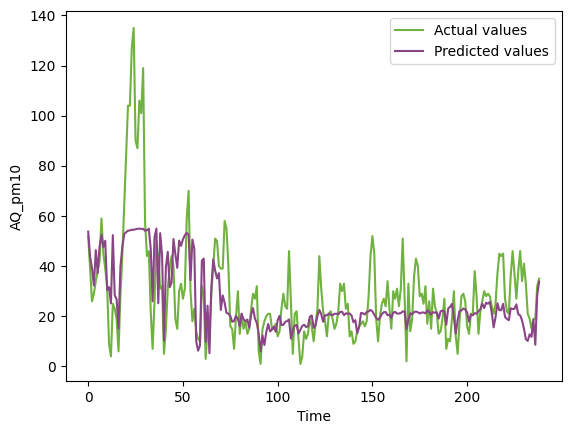

8/8 [==============================] - 0s 3ms/step


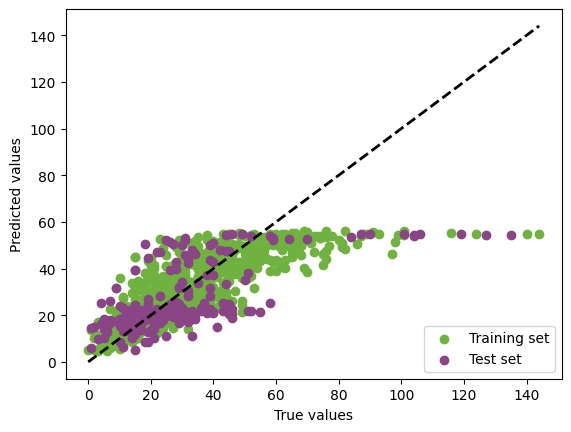


8/8 [==============================] - 0s 3ms/step
iteration2


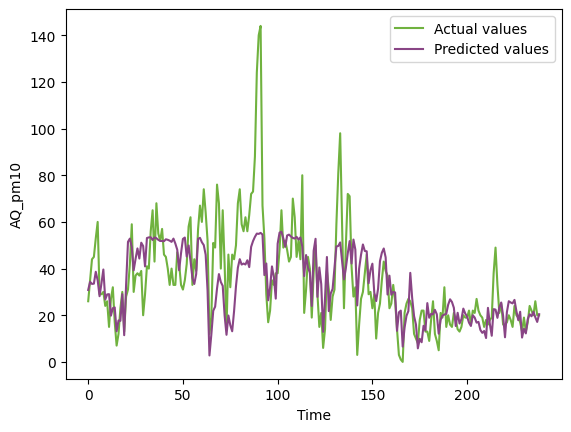

8/8 [==============================] - 0s 3ms/step


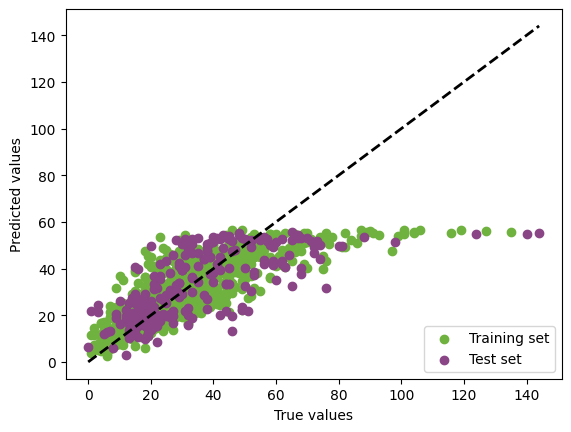


8/8 [==============================] - 0s 3ms/step
iteration3


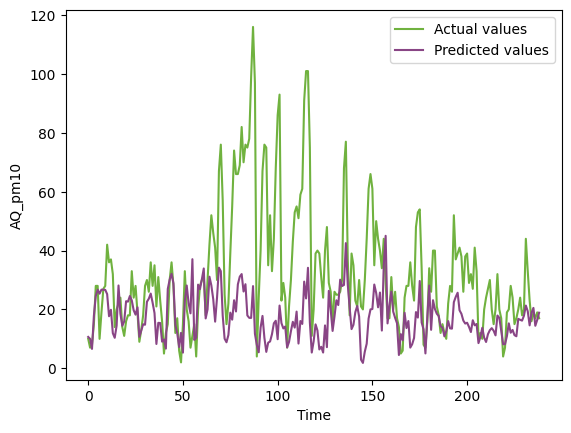

8/8 [==============================] - 0s 2ms/step


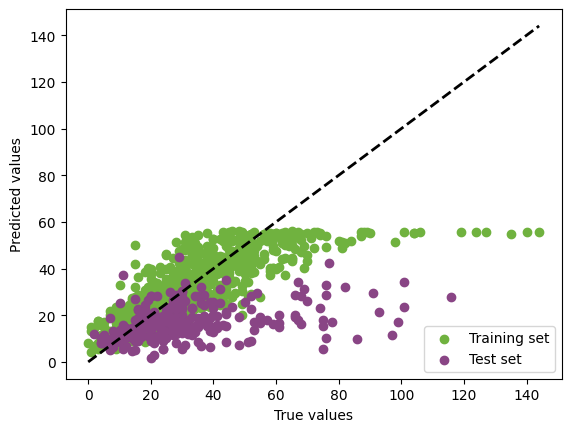


8/8 [==============================] - 0s 2ms/step
iteration4


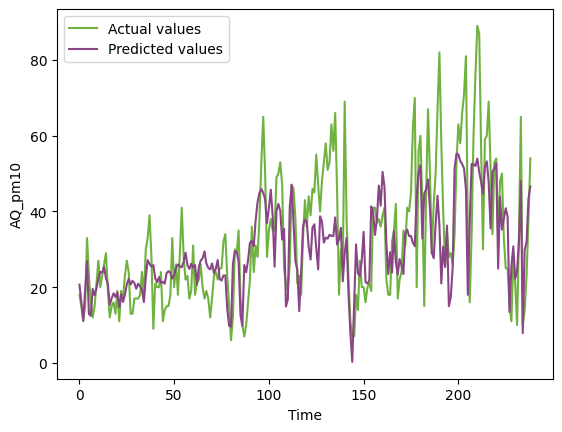

8/8 [==============================] - 0s 2ms/step


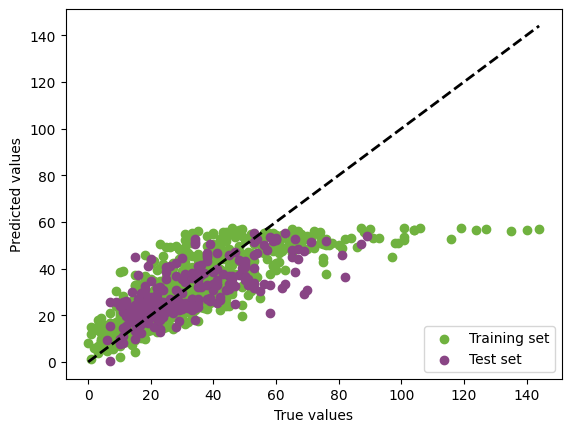


8/8 [==============================] - 0s 2ms/step
iteration5


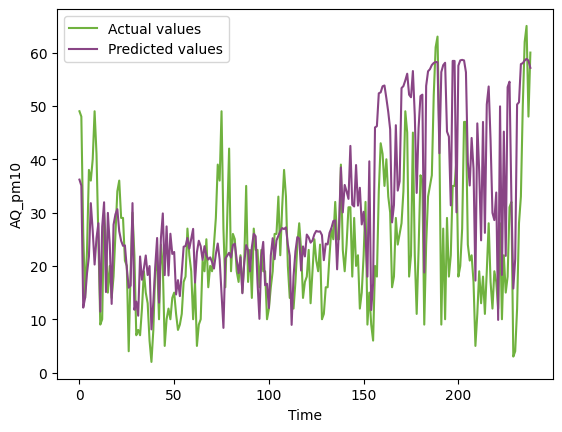

8/8 [==============================] - 0s 2ms/step


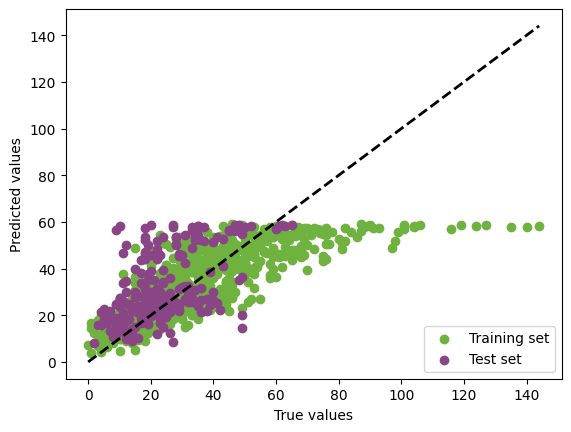

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM, GRU, Bidirectional
from sklearn.preprocessing import StandardScaler

# Rimuovi eventuali righe con valori mancanti
df = df.dropna()

# Ritarda la variabile dipendente di un giorno e crea una nuova colonna
df['AQ_pm10_previous_day'] = df['AQ_pm10'].shift(1)

# Rimuovi la prima riga che avrà un valore mancante a causa dello spostamento
df = df.dropna()

# Seleziona le colonne del dataset da utilizzare come variabili indipendenti (X) e dipendente (y)
X = df[['Latitude', 'Longitude', 'Altitude', 'WE_temp_2m', 'WE_wind_speed_10m_mean', 'WE_wind_speed_10m_max', 'WE_tot_precipitation', 'WE_precipitation_t', 'WE_surface_pressure', 'WE_solar_radiation', 'WE_rh_min', 'WE_rh_mean', 'WE_rh_max', 'WE_wind_speed_100m_max', 'WE_blh_layer_max', 'WE_blh_layer_min', 'EM_nh3_livestock_mm', 'EM_nh3_agr_soils', 'EM_nh3_agr_waste_burn', 'EM_nh3_sum', 'EM_nox_traffic', 'EM_nox_sum', 'EM_so2_sum', 'LI_pigs', 'LI_bovine', 'LA_hvi', 'LA_lvi', 'LA_land_use', 'LA_soil_use', 'AQ_pm10_previous_day']]
y = df[['AQ_pm10']]

# Define number of folds
# no shuffle
n_splits = 5

# Create an instance of KFold
kf = KFold(n_splits=n_splits)

# Create lists to store results
r2_train_list = []
rmse_train_list = []
mae_train_list = []
var_train_list = []
r2_test_list = []
rmse_test_list = []
mae_test_list = []
var_test_list = []

k = 1
# Loop over the splits
for train_index, test_index in kf.split(X):
    # Split the data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Reshape the input data for the GRU layer
    X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
    X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

    # Create and compile the neural network model
    model = keras.Sequential([
        GRU(32, input_shape=(1, X_train_scaled.shape[1])),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model on the training data
    model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, verbose=0)

    # Make a prediction on the training data and calculate metrics
    y_train_pred = model.predict(X_train_reshaped)
    r2_train = r2_score(y_train, y_train_pred)
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    var_train = np.var(y_train - y_train_pred)

    # Make a prediction on the testing data and calculate metrics
    y_test_pred = model.predict(X_test_reshaped)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    var_test = np.var(y_test - y_test_pred)

    # Add results to lists
    r2_train_list.append(r2_train)
    rmse_train_list.append(rmse_train)
    mae_train_list.append(mae_train)
    var_train_list.append(var_train)
    r2_test_list.append(r2_test)
    rmse_test_list.append(rmse_test)
    mae_test_list.append(mae_test)
    var_test_list.append(var_test)

    print("iteration" + str(k))
    # Plot the actual values in blue
    plt.plot(y_test.values, color='xkcd:nasty green', label='Actual values')

    # Plot the predicted values in red
    plt.plot(y_test_pred, color='xkcd:light eggplant', label='Predicted values')

    # Add legend and labels
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('AQ_pm10')

    # Show the plot
    plt.show()

    # Calculate predictions for training and testing data
    y_train_pred = model.predict(X_train_reshaped)
    y_test_pred = model.predict(X_test_reshaped)

    # Disegna il grafico
    plt.scatter(y_train, y_train_pred, color='xkcd:nasty green', label='Training set')
    plt.scatter(y_test, y_test_pred, color='xkcd:light eggplant', label='Test set')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.legend(loc='lower right')
    plt.show()

    print()
    k += 1


In [13]:
# Calculate mean results over all splits
##Train
r2_train_mean = sum(r2_train_list) / n_splits
rmse_train_mean = sum(rmse_train_list) / n_splits
mae_train_mean = sum(mae_train_list) / n_splits
var_train_mean = sum(var_train_list)/ n_splits
##test
r2_test_mean = sum(r2_test_list) / n_splits
rmse_test_mean = sum(rmse_test_list) / n_splits
mae_test_mean = sum(mae_test_list) / n_splits
var_test_mean = sum(var_test_list)/ n_splits


##Train

In [14]:
print(r2_train_mean )
print(rmse_train_mean)
print(mae_train_mean)
print(var_train_mean)

0.6230492890322444
11.877839068167455
7.882667063220277
AQ_pm10    140.715297
dtype: float64


## Test

In [15]:
print(r2_test_mean )
print(rmse_test_mean)
print(mae_test_mean)
print(var_test_mean)

0.09969366447996646
16.777197497195097
11.858873555550515
AQ_pm10    239.5345
dtype: float64
